<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/network_analysis_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

Cloning into 'autism-info-llm-comparison'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 111 (delta 44), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 7.32 MiB | 7.72 MiB/s, done.
Resolving deltas: 100% (44/44), done.


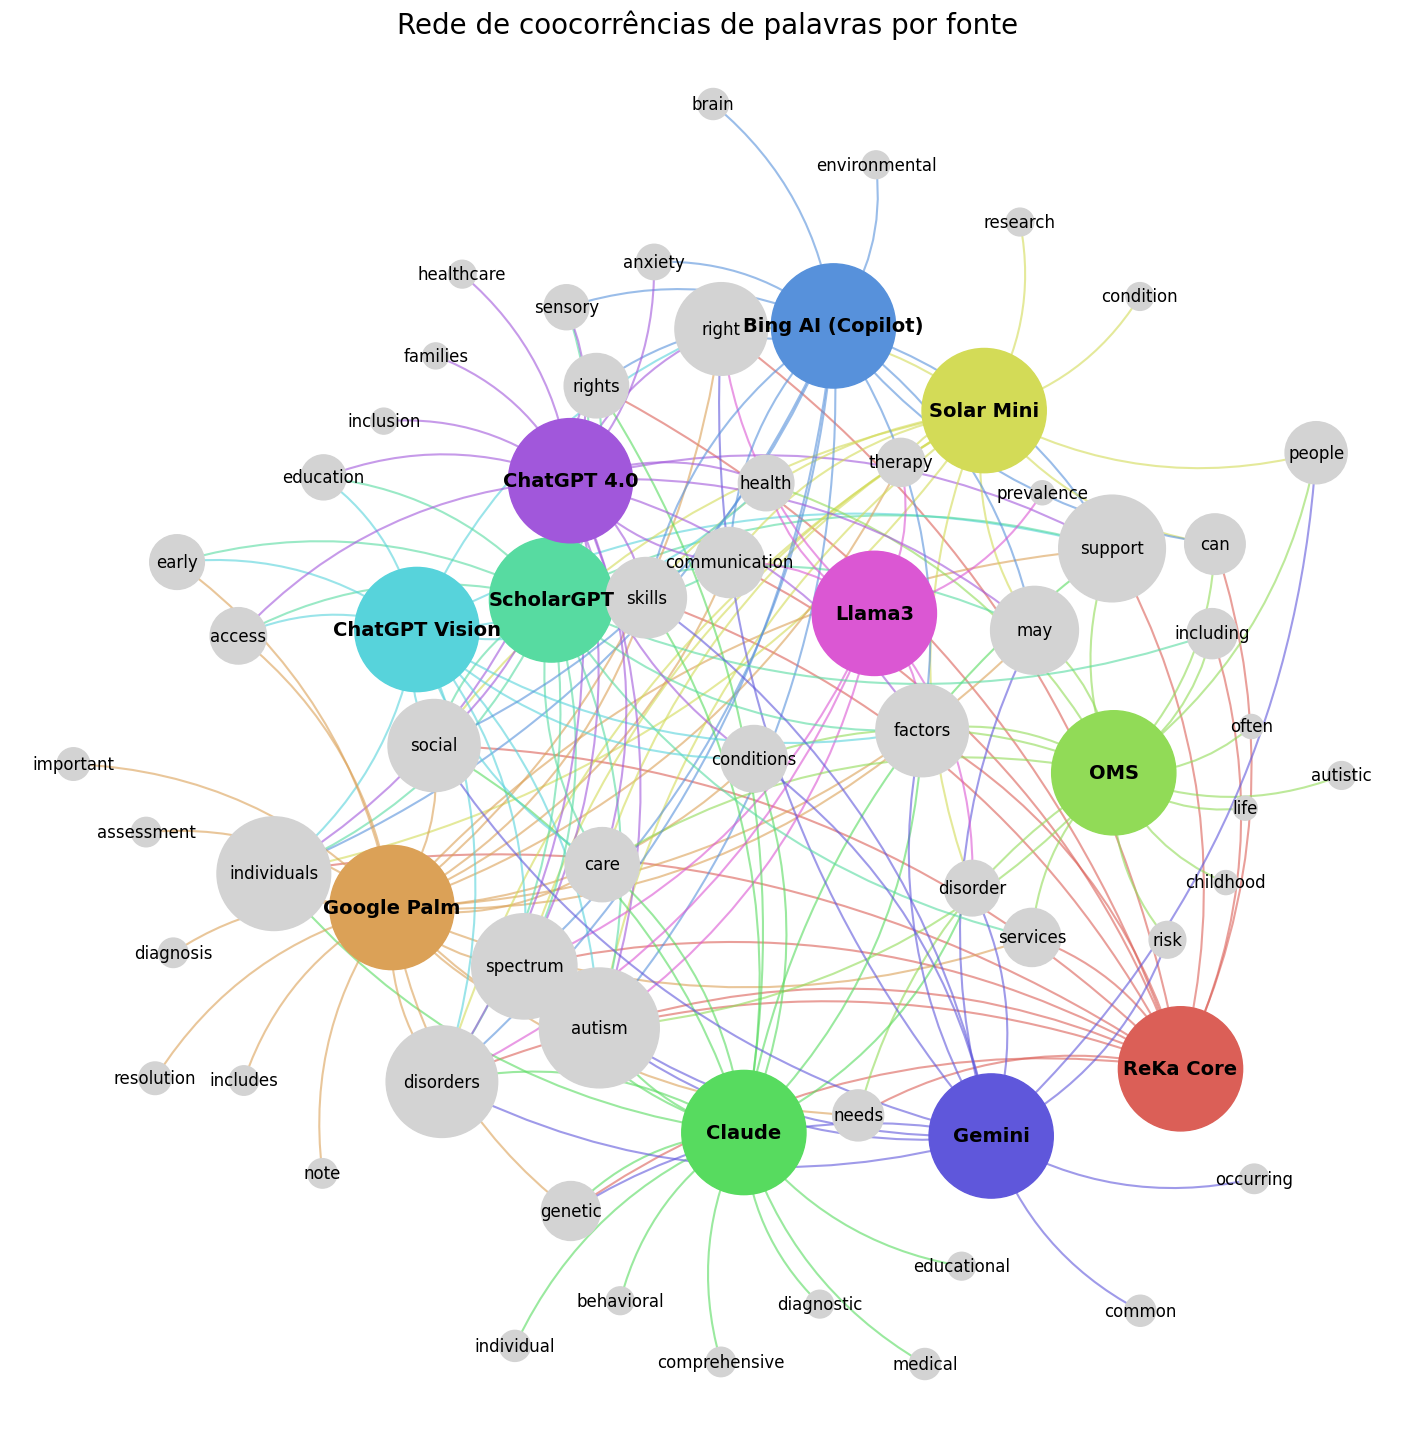

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.patches import FancyArrowPatch
from matplotlib import colors as mcolors


# Carregar CSV
df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')

# Filtrar apenas arestas com n > 2
df_filtered = df[df['n'] > 2]

# Criar grafo
G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])


networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Obter paleta e remover tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]  # remove o cinza (~[0.7, 0.7, 0.7])

# Garantir que tenha cores suficientes
if len(palette) < len(networks):
    raise ValueError("Número de redes maior que as cores disponíveis sem o cinza!")

network_color_map = dict(zip(networks, palette))

node_colors = [network_color_map[node] if node in networks else 'lightgray' for node in G.nodes()]
node_sizes = [8000 if node in networks else 100 + word_freq.get(node, 1) * 50 for node in G.nodes()]
# Gerar layout inicial com kamada_kawai_layout
pos = nx.kamada_kawai_layout(G)

# Calcular as distâncias dos nós ao centro
center = np.array([0.0, 0.0])  # Posição central
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}

# Ajustar posições para expandir o centro e compactar bordas
scale_factor = 1.5
adjusted_pos = {}
for node, (x, y) in pos.items():
    distance = distances_to_center[node]
    scale = (1 / (distance + 1)) * scale_factor
    adjusted_pos[node] = (x * scale, y * scale)

# Preparar as cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar a figura principal
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar os nós
nx.draw_networkx_nodes(G, adjusted_pos, node_color=node_colors, node_size=node_sizes, ax=ax)


# Arestas retas
# nx.draw_networkx_edges(G, adjusted_pos, edge_color=edge_colors, alpha=0.6, width=1.0, ax=ax)
# Desenhar arestas curvilíneas manualmente
for (u, v), color in zip(G.edges(), edge_colors):
    if u == v:
        continue  # ignorar laços (se houver)

    # Pegar posições
    x1, y1 = adjusted_pos[u]
    x2, y2 = adjusted_pos[v]

    # Criar uma curva de Bézier (curva quadrática)
    rad = 0.2  # fator de curvatura (pode ajustar)
    connectionstyle = f"arc3,rad={rad}"

    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        connectionstyle=connectionstyle,
        color=color,
        linewidth=1.5,
        alpha=0.6,
        arrowstyle='-',
        zorder=0  # para ficar atrás dos nós
    )
    ax.add_patch(arrow)

# Adicionar os textos
texts = []
for node, (x, y) in adjusted_pos.items():
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    texts.append(ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight))


ax.set_title("Rede de coocorrências de palavras por fonte", fontsize=20)
ax.axis('off')
plt.show()


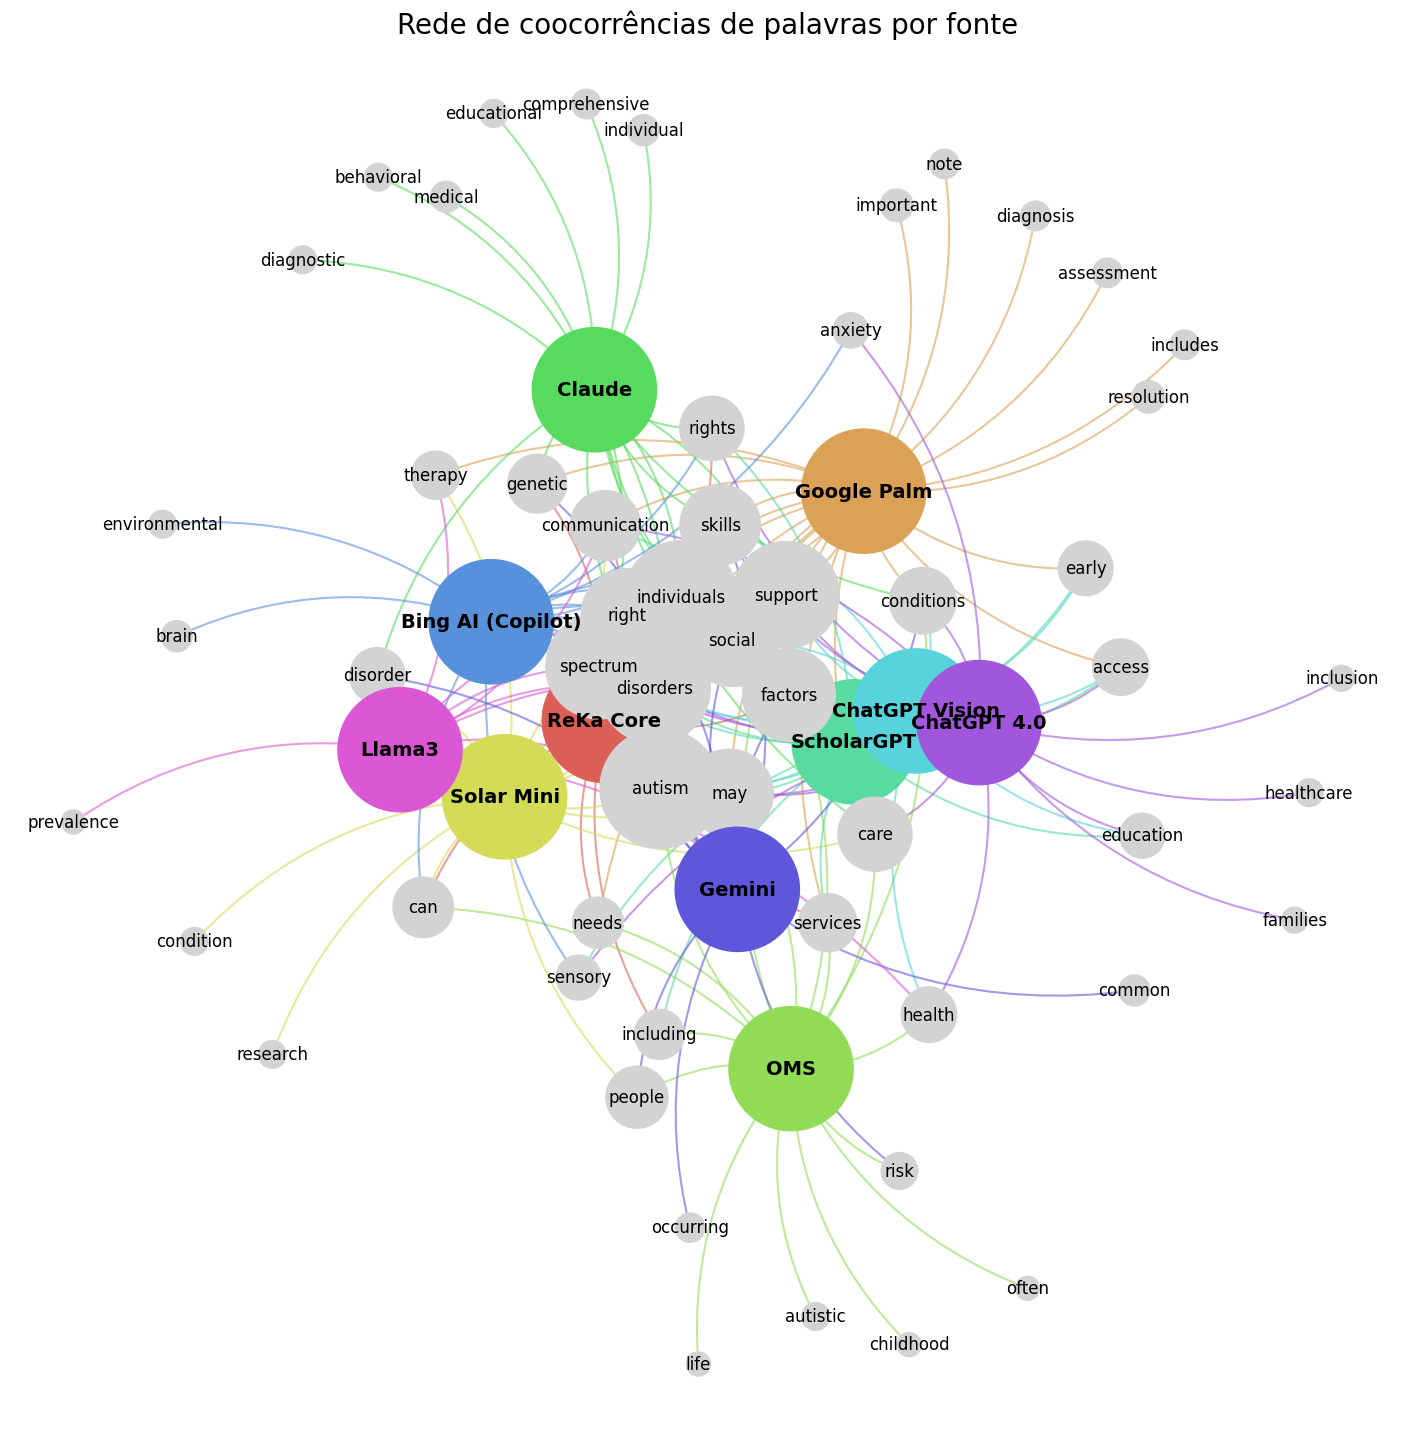

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.patches import FancyArrowPatch
from matplotlib import colors as mcolors


# Carregar CSV
df = pd.read_csv('autism-info-llm-comparison/top_words_per_network.csv')

# Filtrar apenas arestas com n > 2
df_filtered = df[df['n'] > 2]

# Criar grafo
G = nx.Graph()
for _, row in df_filtered.iterrows():
    G.add_edge(row['network'], row['word'], weight=row['n'])


networks = df['network'].unique()
word_freq = df_filtered.groupby('word')['n'].sum().to_dict()

# Obter paleta e remover tons de cinza
raw_palette = sns.color_palette("hls", n_colors=12)
palette = [color for color in raw_palette if not all(abs(c - 0.7) < 0.05 for c in color)]  # remove o cinza (~[0.7, 0.7, 0.7])

# Garantir que tenha cores suficientes
if len(palette) < len(networks):
    raise ValueError("Número de redes maior que as cores disponíveis sem o cinza!")

network_color_map = dict(zip(networks, palette))

node_colors = [network_color_map[node] if node in networks else 'lightgray' for node in G.nodes()]
node_sizes = [8000 if node in networks else 100 + word_freq.get(node, 1) * 50 for node in G.nodes()]
# Gerar layout inicial com kamada_kawai_layout
pos = nx.spring_layout(G, seed = 74)

# Calcular as distâncias dos nós ao centro
center = np.array([0.0, 0.0])  # Posição central
distances_to_center = {node: np.linalg.norm(np.array([x, y]) - center) for node, (x, y) in pos.items()}

# Ajustar posições para expandir o centro e compactar bordas
scale_factor = 1.5
adjusted_pos = {}
for node, (x, y) in pos.items():
    distance = distances_to_center[node]
    scale = (1 / (distance + 1)) * scale_factor
    adjusted_pos[node] = (x * scale, y * scale)

# Preparar as cores das arestas
edge_colors = []
for u, v in G.edges():
    if u in network_color_map:
        edge_colors.append(network_color_map[u])
    elif v in network_color_map:
        edge_colors.append(network_color_map[v])
    else:
        edge_colors.append("gray")

# Criar a figura principal
fig, ax = plt.subplots(figsize=(18, 18))

# Desenhar os nós
nx.draw_networkx_nodes(G, adjusted_pos, node_color=node_colors, node_size=node_sizes, ax=ax)


# Arestas retas
# nx.draw_networkx_edges(G, adjusted_pos, edge_color=edge_colors, alpha=0.6, width=1.0, ax=ax)
# Desenhar arestas curvilíneas manualmente
for (u, v), color in zip(G.edges(), edge_colors):
    if u == v:
        continue  # ignorar laços (se houver)

    # Pegar posições
    x1, y1 = adjusted_pos[u]
    x2, y2 = adjusted_pos[v]

    # Criar uma curva de Bézier (curva quadrática)
    rad = 0.2  # fator de curvatura (pode ajustar)
    connectionstyle = f"arc3,rad={rad}"

    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        connectionstyle=connectionstyle,
        color=color,
        linewidth=1.5,
        alpha=0.6,
        arrowstyle='-',
        zorder=0  # para ficar atrás dos nós
    )
    ax.add_patch(arrow)

# Adicionar os textos
texts = []
for node, (x, y) in adjusted_pos.items():
    fontweight = 'bold' if node in networks else 'normal'
    fontsize = 14 if node in networks else 12
    texts.append(ax.text(x, y, node, fontsize=fontsize, ha='center', va='center', fontweight=fontweight))


ax.set_title("Rede de coocorrências de palavras por fonte", fontsize=20)
ax.axis('off')
plt.show()


In [3]:
# Primeiro, criar um dicionário com as frequências das palavras da OMS
frequencias_oms = df[df['network'] == 'OMS'].set_index('word')['n'].to_dict()

# Função para contar quantas palavras coincidem com a OMS e têm frequência semelhante
def contar_palavras_similares(sub_df, tolerancia=5):
    count = 0
    for _, row in sub_df.iterrows():
        palavra = row['word']
        freq = row['n']
        if palavra in frequencias_oms:
            if abs(freq - frequencias_oms[palavra]) <= tolerancia:
                count += 1
    return count

# Aplicar por rede (excluindo OMS)
redes_df = df[df['network'] != 'OMS']
resultados_similares = redes_df.groupby('network').apply(contar_palavras_similares).reset_index()
resultados_similares.columns = ['network', 'quantidade_palavras_similares']

# Ordenar do maior para o menor
resultados_similares = resultados_similares.sort_values(by='quantidade_palavras_similares', ascending=False)
resultados_similares.head()


<ipython-input-3-86d2a902c9b9>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_similares = redes_df.groupby('network').apply(contar_palavras_similares).reset_index()


,network,quantidade_palavras_similares
1,ChatGPT 4.0,5
8,ScholarGPT,5
6,Llama3,4
5,Google Palm,4
0,Bing AI (Copilot),3
